# License detector pipeline visualization

In [2]:
import cv2
import matplotlib

from matplotlib import pyplot as plt

import numpy as np


def show(image: np.ndarray):
    if len(image.shape) == 2:
        plt.imshow(image, aspect="auto", cmap="gray")
    else:
        plt.imshow(image[...,::-1], aspect="auto", cmap="hsv")
    plt.axis("off")
    plt.show()


path = "../datasets/01-polish-licence-plates/train/0001Z4JTCII2TV0E-C122-F4_jpg.rf.a098ae845ee8bda6ed47e08e34b9ccf2.jpg"

matplotlib.rcParams["savefig.pad_inches"] = 0

## Image loading

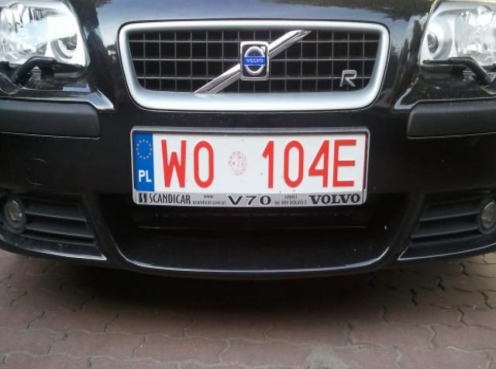

In [3]:
from twm_proj.implementation.image_reader import ImageReader

with open(path, "rb") as file:
    image = ImageReader().read(file)

show(image)

## Initial filtering (TODO)

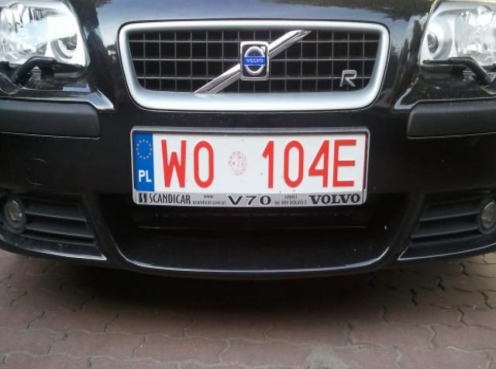

In [4]:
from twm_proj.implementation.initial_filter import InitialFilter

filtered = InitialFilter().filter(image)
show(filtered)

## Edge filter

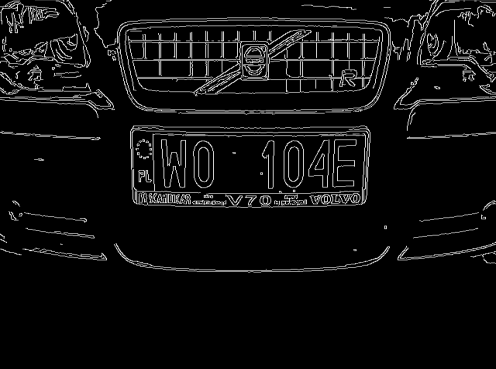

In [5]:
from twm_proj.implementation.edge_filter import EdgeFilter

edges = EdgeFilter().filter(image)
show(edges)

## Contour detector

[array([[[343, 467]]], dtype=int32),
 array([[[624, 449]],
 
        [[624, 451]],
 
        [[627, 454]],
 
        [[627, 455]],
 
        [[628, 456]],
 
        [[631, 456]],
 
        [[632, 457]],
 
        [[633, 456]],
 
        [[638, 456]],
 
        [[639, 457]],
 
        [[638, 456]],
 
        [[633, 456]],
 
        [[632, 457]],
 
        [[631, 456]],
 
        [[629, 456]],
 
        [[627, 454]],
 
        [[627, 453]],
 
        [[624, 450]]], dtype=int32),
 array([[[133, 447]],
 
        [[132, 448]],
 
        [[131, 448]],
 
        [[134, 448]]], dtype=int32),
 array([[[116, 447]],
 
        [[126, 447]]], dtype=int32),
 array([[[ 89, 443]],
 
        [[ 92, 443]]], dtype=int32),
 array([[[633, 438]],
 
        [[632, 439]],
 
        [[630, 439]],
 
        [[629, 440]],
 
        [[626, 440]],
 
        [[625, 441]],
 
        [[623, 441]],
 
        [[623, 442]],
 
        [[622, 443]],
 
        [[621, 442]],
 
        [[620, 442]],
 
        [[619, 443]],
 

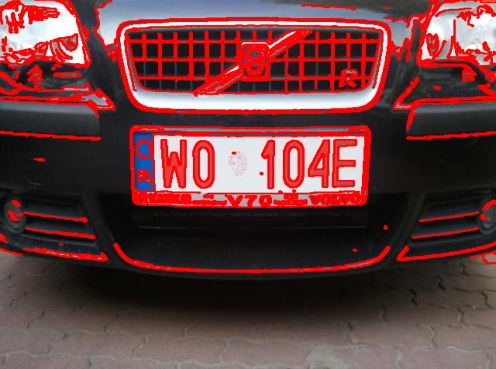

In [6]:
from twm_proj.implementation.contour_detector import ContourDetector

contours = [*ContourDetector().detect(edges)]
display(contours)
contours_image = cv2.drawContours(np.copy(image), contours, -1, (0,0,255), 2)
show(contours_image)

## Detekcja prostokątów

[array([[[155,  53]],
 
        [[187, 187]],
 
        [[485, 168]],
 
        [[490,  44]]], dtype=int32),
 array([[[155,  54]],
 
        [[487,  43]],
 
        [[488, 159]],
 
        [[190, 188]]], dtype=int32),
 array([[[193,  48]],
 
        [[481,  50]],
 
        [[482, 152]],
 
        [[490,  53]]], dtype=int32),
 array([[[154,  47]],
 
        [[491,  40]],
 
        [[487, 174]],
 
        [[492,  40]]], dtype=int32)]

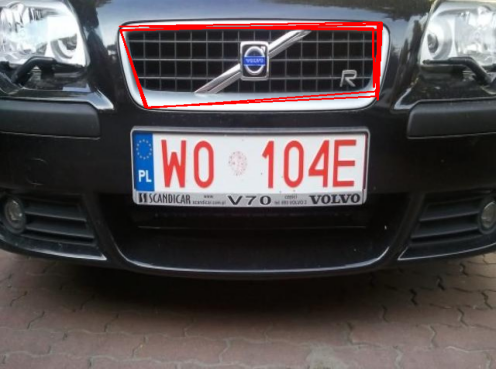

In [7]:
from twm_proj.implementation.rect_detector import RectDetector

rects = [RectDetector().detect(contour) for contour in contours]
rects = [rect for rect in rects if rect is not None]
rects_image = cv2.drawContours(image, rects, -1, (0, 0, 255), 2)
show(rects_image)